In [15]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from datetime import time, timedelta
import matplotlib.dates as mdates
from datetime import datetime

from MAppServer.settings import DOWNLOAD_FOLDER_ABSOLUTE_PATH


In [3]:
file = ""
for file_ in glob.glob(f"{DOWNLOAD_FOLDER_ABSOLUTE_PATH}/users*.csv"):
    file = file_
    break

print("Users file:", file)

Users file: /Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/users_2023-07-12_12-46-19.csv


In [11]:
df = pd.read_csv(file, index_col=0)
users = df.user.values

In [53]:
df_step_content = []

for user in users:

    if "smallobj" in user or "michele" in user or "student" in user:
        print(f"Skipping user `{user}`")
        continue

    file = ""
    for file_ in glob.glob(f"{DOWNLOAD_FOLDER_ABSOLUTE_PATH}/*reward*.csv"):
        file = file_
        break
    df_rwd = pd.read_csv(file, index_col=0)
    df_rwd["dt"] = pd.to_datetime(df_rwd["date"], utc=False, format='ISO8601')
    df_rwd["dt"] = df_rwd["dt"].dt.tz_localize('Europe/London')

    for file_ in glob.glob(f"{DOWNLOAD_FOLDER_ABSOLUTE_PATH}/*activity*.csv"):
        file = file_
        break
    df_act = pd.read_csv(file, index_col=0)
    df_act.dt = pd.to_datetime(df_act.dt)
    df_act.dt = df_act.dt.dt.tz_convert('Europe/London')

    days = np.asarray([datetime.fromtimestamp(dt.timestamp()).date() for dt in df_act.dt])
    print(days)
    print("yo", len(np.unique(days)))
    print(len(days))
    n_days = len(df_act.dt.date.unique())
    print("n days", n_days)

    n_days = len(df_act.dt.dt.date.unique())
    print("n days", n_days)
    print(df_act.dt.dt.date.unique())
    print("*"*10)

    if len(df_act) < 100 or n_days < 10:
        print(f"Skipping user `{user}`")
        continue

    conditions = df_rwd.condition.unique()

    for cond in conditions:
        df_rwd_cond = df_rwd[df_rwd.condition == cond]
        uniq_date = df_rwd_cond["dt"].dt.date.unique()
        for date in uniq_date:
            if date >= datetime.now().date():
                continue
            print(date)
            print(len(df_act))
            df_act_that_day = df_act[df_act["dt"].dt.date == date]
            print(len(df_act_that_day))
            y = df_act_that_day.step_midnight
            # Patch in case of re-installation
            if np.sum(np.diff(y) < 0) > 0:
                idx = 1 + np.arange(len(y)-1)[np.diff(y) < 0][0]
                y[idx:] =  y[idx-1] + y[idx:] - y[idx]

            df_step_content.append({"date": date, "step": max(y), "condition": cond})
    break


ValueError: time data "2023-06-25 10:02:38+00:00" doesn't match format "%Y-%m-%d %H:%M:%S.%f%z", at position 740. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [8]:
df = pd.read_csv(file, index_col=0)
df.dt = pd.to_datetime(df.dt, utc=False, format='ISO8601')
df.dt = df.dt.dt.tz_convert('Europe/London')

uniq_date = df.dt.dt.date.unique()

Found the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/09AU_interaction_2023-07-12_12-46-19.csv`


(19550.0, 19551.0)

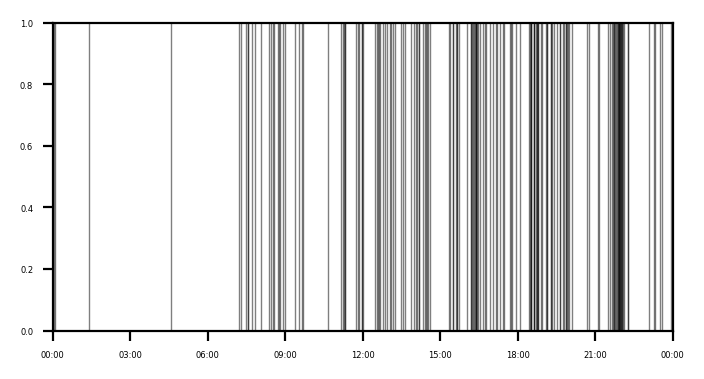

In [48]:
# Reference point (today but the choice is arbitrary)
some_day = datetime.today()
midnight = datetime.combine(some_day, time.min)
min_ts = midnight.timestamp()
max_ts = (midnight + timedelta(days=1)).timestamp()

df_onresume = df[df.event == "onResume"]

x = df_onresume.dt.map(lambda entry: entry.replace(day=some_day.day, month=some_day.month, year=some_day.year))

x = [datetime.fromtimestamp(x_.timestamp()) for x_ in x if x_ not in x]

plt.rcParams.update({'font.size': 3})
fig, ax = plt.subplots(figsize=(4, 2))
for i in range(len(x)):
    x_  = x[i]
    if i > 0 and x[i] - x[i-1] > timedelta(minutes=1):
        # val = x_.timestamp() - min_ts
        # print(val)
        ax.axvline(x_, ymin=0, ymax=1, color="black", alpha=0.5, linewidth=0.5)
    # print(x_)
    # print(datetime.fromtimestamp(x_.timestamp()))
    # ax.axvline(datetime.fromtimestamp(x_.timestamp()), ymin=0, ymax=1, color="blue", alpha=0.5)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', ))
ax.set_xlim(datetime.fromtimestamp(min_ts), datetime.fromtimestamp(max_ts))

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11AV_interaction_2023-07-12_12-46-19.csv`...


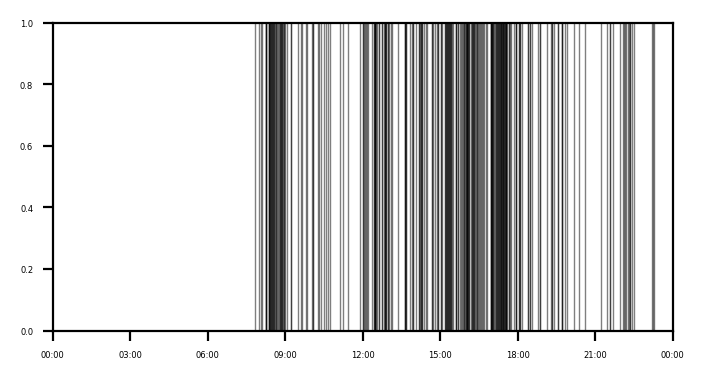

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/15MM_interaction_2023-07-12_12-46-19.csv`...


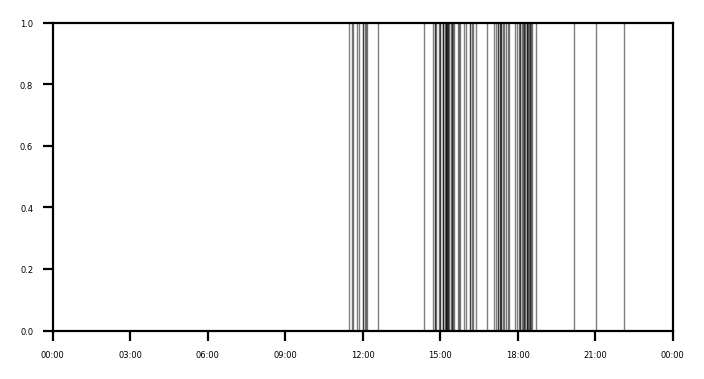

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/18DA_interaction_2023-07-12_12-46-19.csv`...


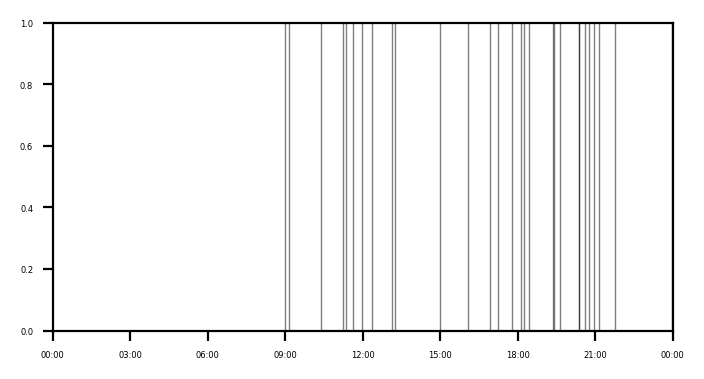

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/152O_interaction_2023-07-12_12-46-19.csv`...


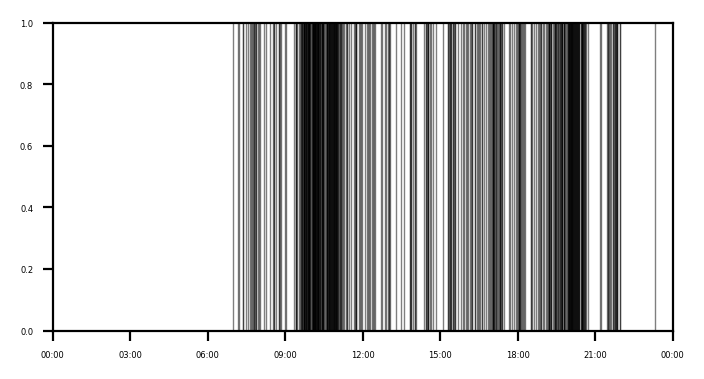

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/132L_interaction_2023-07-12_12-46-19.csv`...


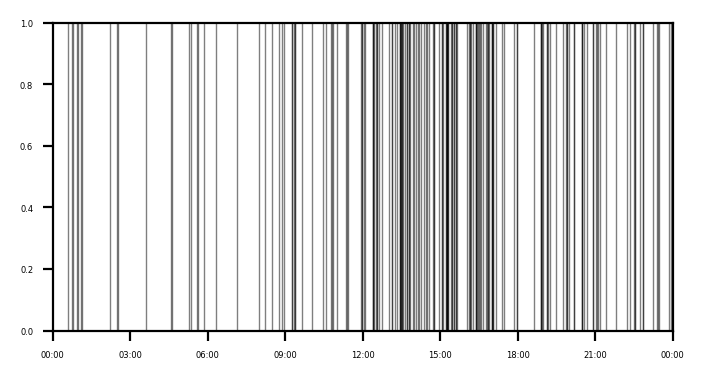

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/19EN_interaction_2023-07-12_12-46-19.csv`...


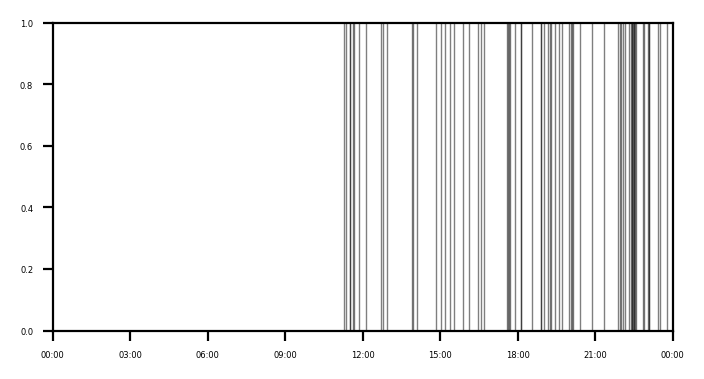

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/272L_interaction_2023-07-12_12-46-19.csv`...


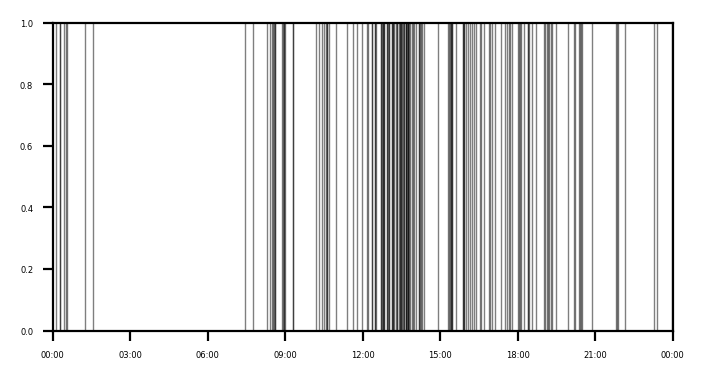

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/12JA_interaction_2023-07-12_12-46-19.csv`...


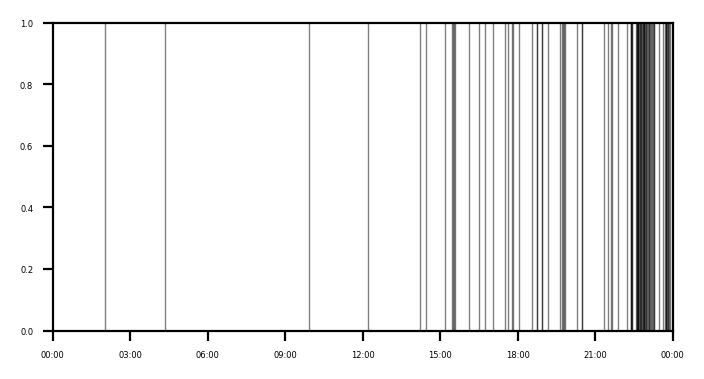

Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/student_a_beta1_interaction_2023-07-12_12-46-19.csv`
Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/smallobj_interaction_2023-07-12_12-46-19.csv`
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/09AU_interaction_2023-07-12_12-46-19.csv`...


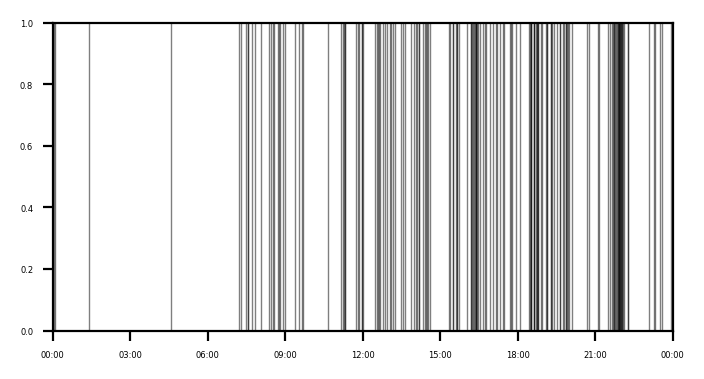

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/302M_interaction_2023-07-12_12-46-19.csv`...


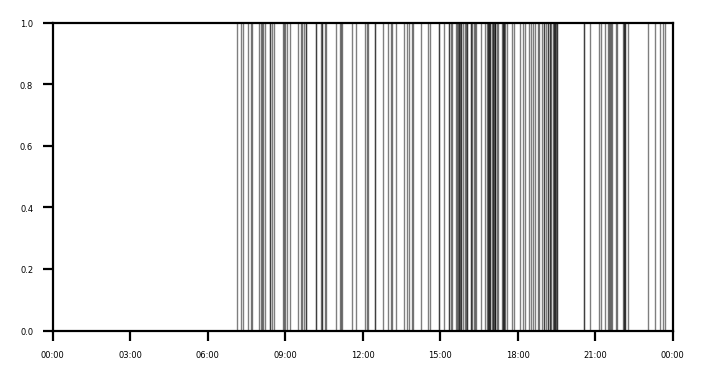

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/02TA_interaction_2023-07-12_12-46-19.csv`...


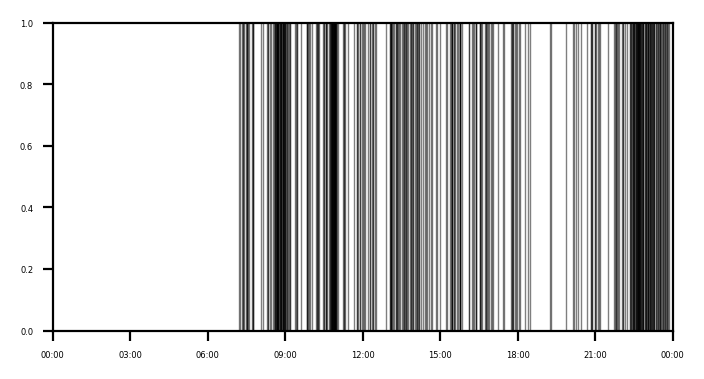

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/192Z_interaction_2023-07-12_12-46-19.csv`...


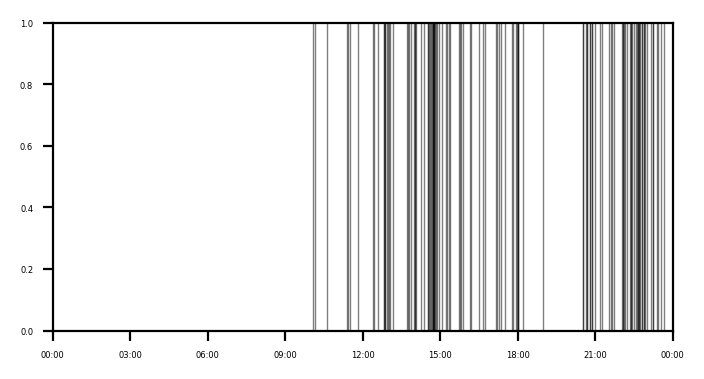

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/13KU_interaction_2023-07-12_12-46-19.csv`...


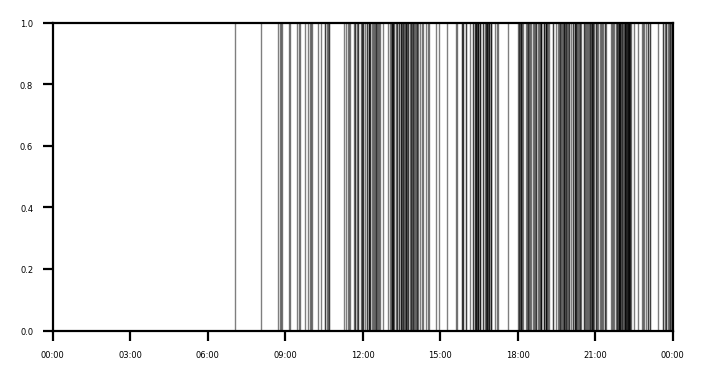

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/162W_interaction_2023-07-12_12-46-19.csv`...


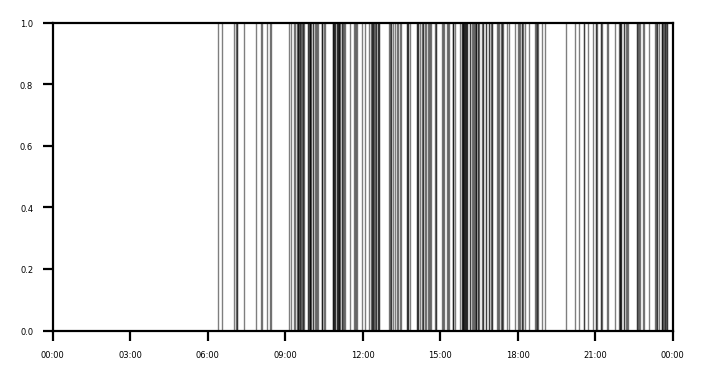

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/06DS_interaction_2023-07-12_12-46-19.csv`...
Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/06DS_interaction_2023-07-12_12-46-19.csv`, not enough data
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/28OM_interaction_2023-07-12_12-46-19.csv`...


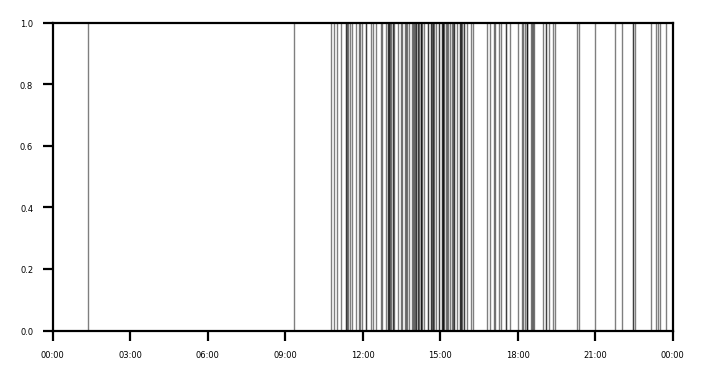

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/25TI_interaction_2023-07-12_12-46-19.csv`...


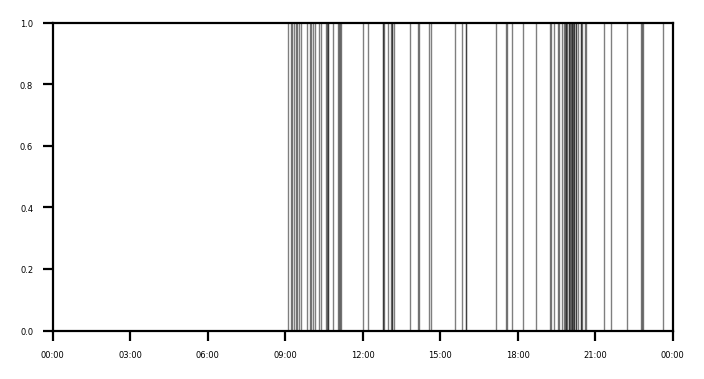

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11KD_interaction_2023-07-12_12-46-19.csv`...


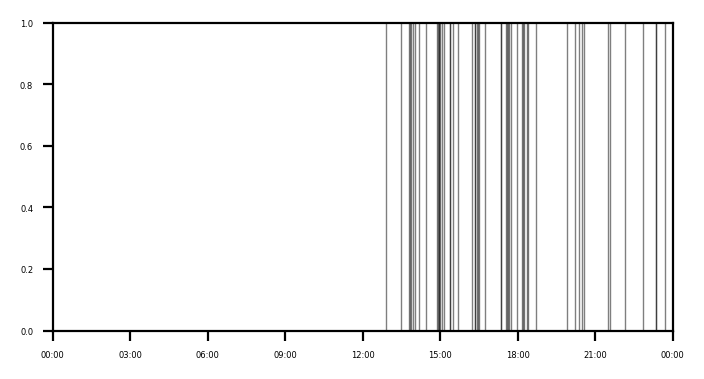

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/22MH_interaction_2023-07-12_12-46-19.csv`...


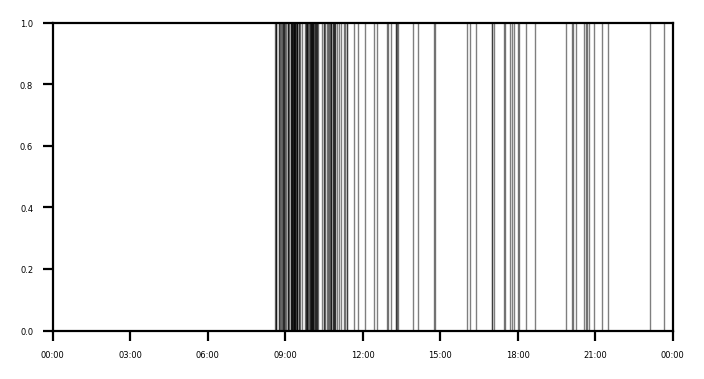

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/27SI_interaction_2023-07-12_12-46-19.csv`...


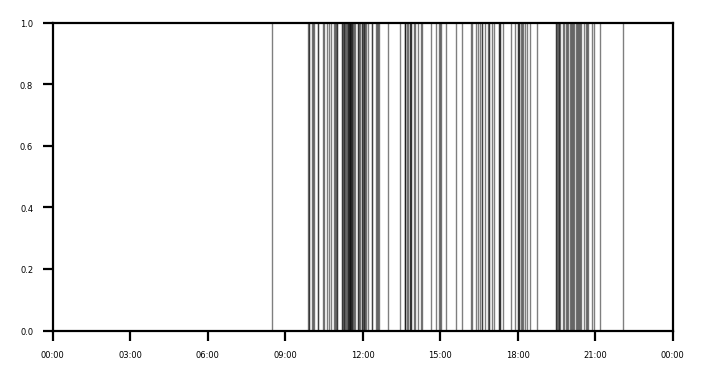

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/10AN_interaction_2023-07-12_12-46-19.csv`...


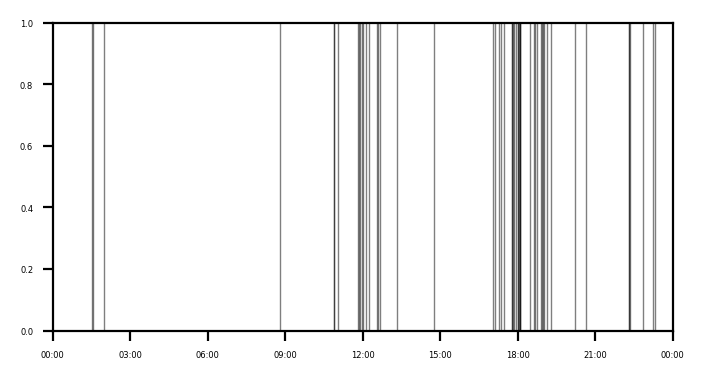

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/272W_interaction_2023-07-12_12-46-19.csv`...


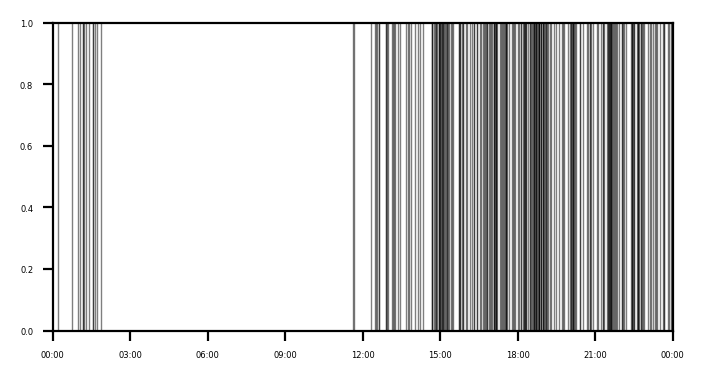

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/1362_interaction_2023-07-12_12-46-19.csv`...


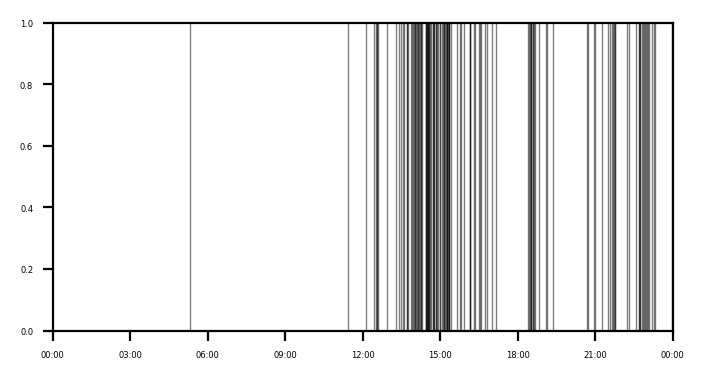

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/06AS_interaction_2023-07-12_12-46-19.csv`...


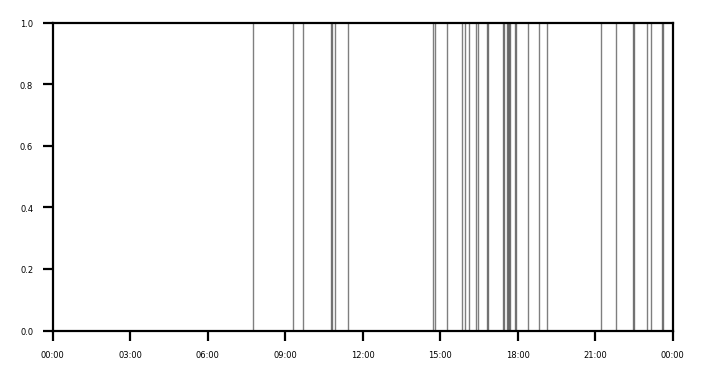

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/15SM_interaction_2023-07-12_12-46-19.csv`...


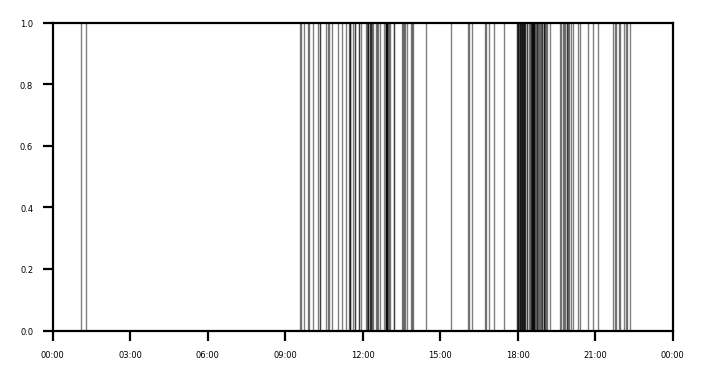

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/12AE_interaction_2023-07-12_12-46-19.csv`...
Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/12AE_interaction_2023-07-12_12-46-19.csv`, not enough data
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/152A_interaction_2023-07-12_12-46-19.csv`...


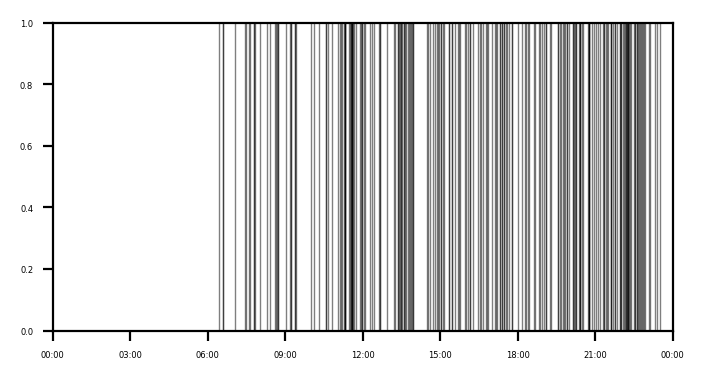

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/07EI_interaction_2023-07-12_12-46-19.csv`...
Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/07EI_interaction_2023-07-12_12-46-19.csv`, not enough data
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/252S_interaction_2023-07-12_12-46-19.csv`...


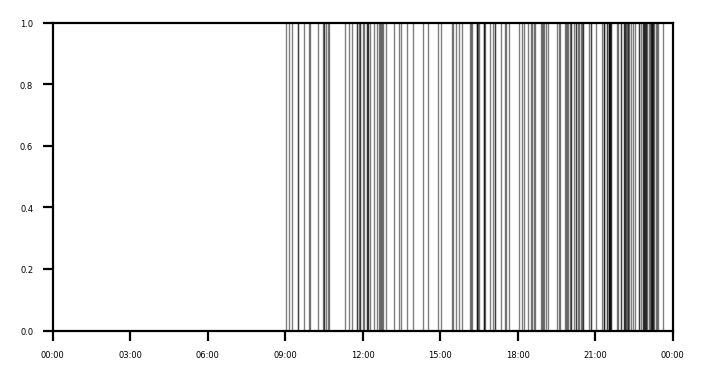

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/24SA_interaction_2023-07-12_12-46-19.csv`...


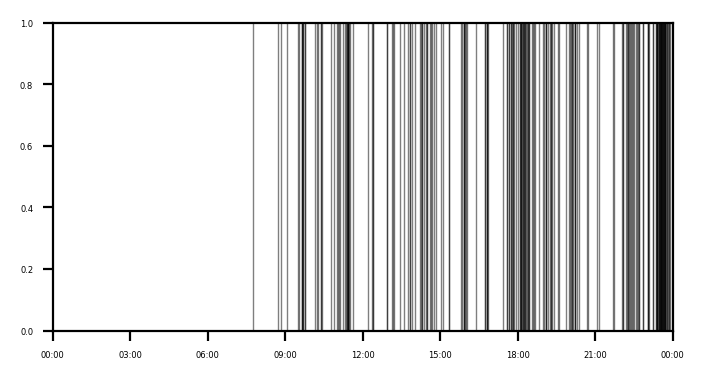

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11SA_interaction_2023-07-12_12-46-19.csv`...


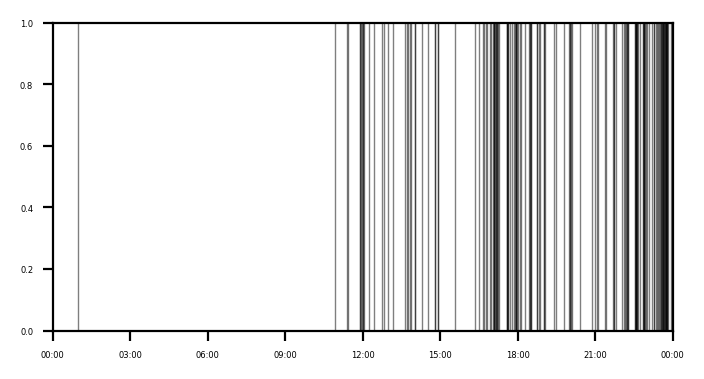

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/102P_interaction_2023-07-12_12-46-19.csv`...


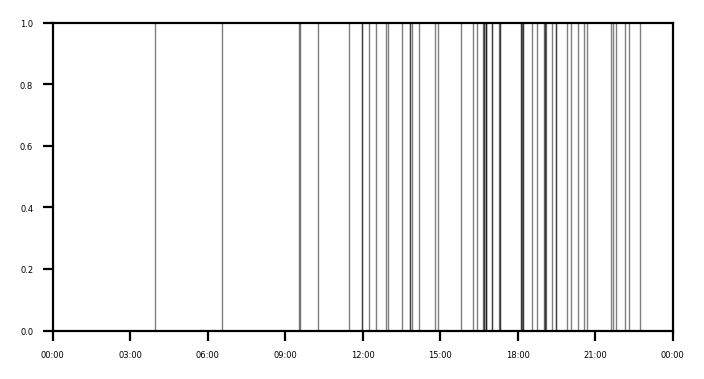

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/02MY_interaction_2023-07-12_12-46-19.csv`...


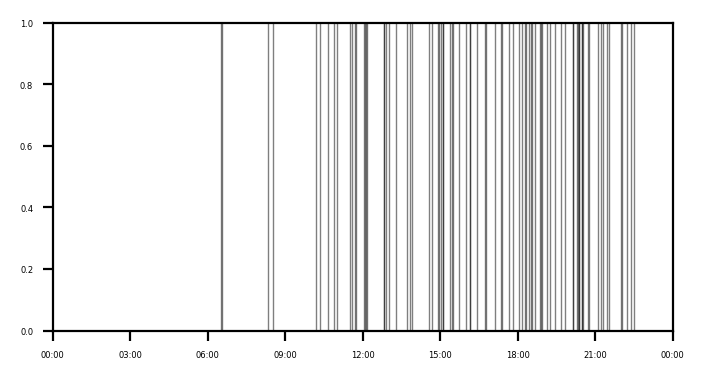

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/162G_interaction_2023-07-12_12-46-19.csv`...


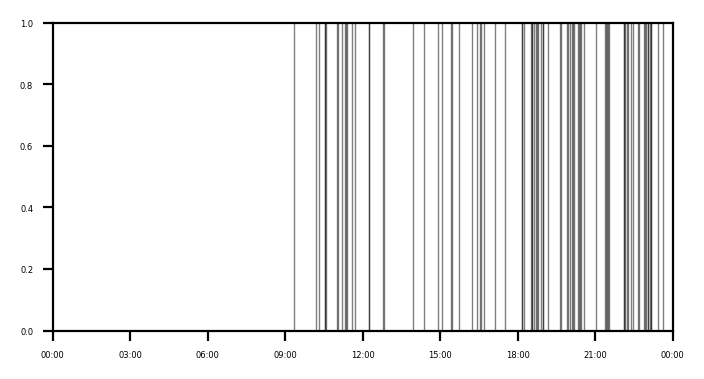

Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/michele_beta1_interaction_2023-07-12_12-46-19.csv`
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/25J1_interaction_2023-07-12_12-46-19.csv`...


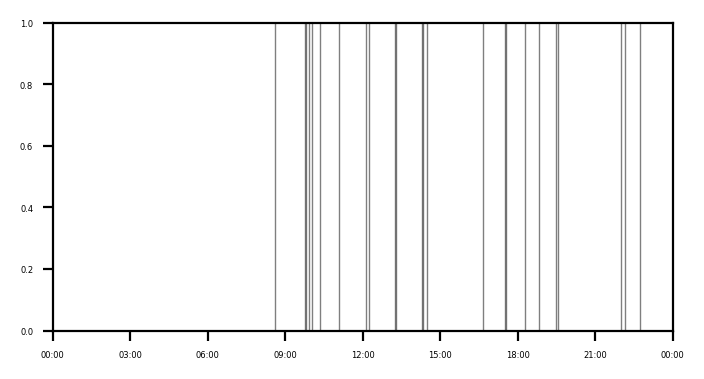

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/152G_interaction_2023-07-12_12-46-19.csv`...


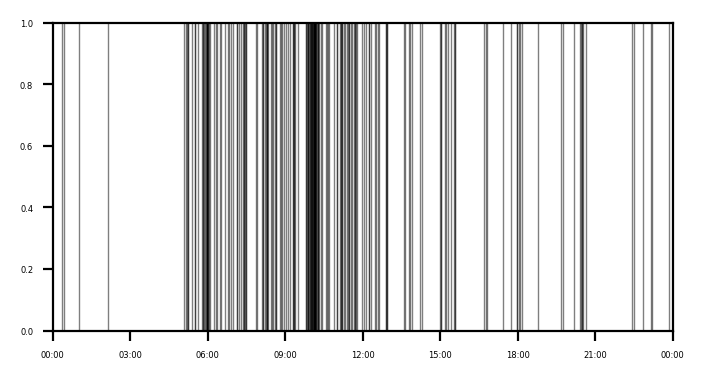

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/28E1_interaction_2023-07-12_12-46-19.csv`...
Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/28E1_interaction_2023-07-12_12-46-19.csv`, not enough data
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/13SK_interaction_2023-07-12_12-46-19.csv`...
Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/13SK_interaction_2023-07-12_12-46-19.csv`, not enough data
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/19AN_interaction_2023-07-12_12-46-19.csv`...


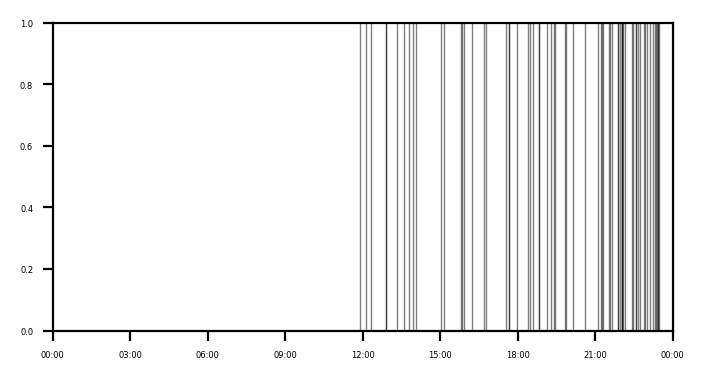

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/242K_interaction_2023-07-12_12-46-19.csv`...


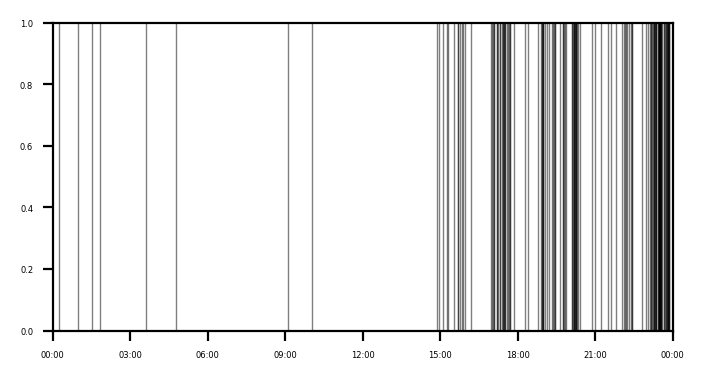

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/182E_interaction_2023-07-12_12-46-19.csv`...


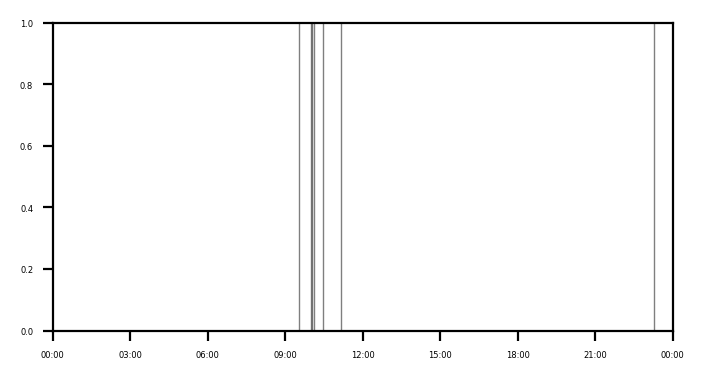

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/09A1_interaction_2023-07-12_12-46-19.csv`...


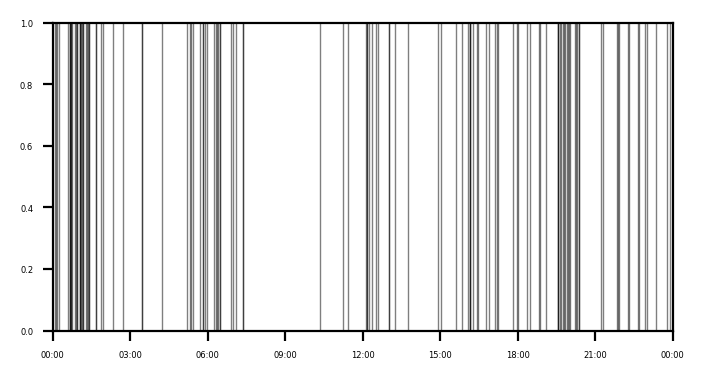

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/23MI_interaction_2023-07-12_12-46-19.csv`...
Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/23MI_interaction_2023-07-12_12-46-19.csv`, not enough data


In [50]:
for file in glob.glob(f"{DOWNLOAD_FOLDER_ABSOLUTE_PATH}/*interaction*.csv"):

    if "smallobj" in file or "michele" in file or "student" in file:
        print(f"Skipping file `{file}`")
        continue

    print(f"Considering the file `{file}`...")

    df = pd.read_csv(file, index_col=0)
    if len(df) < 10:
        print(f"Skipping file `{file}`, not enough data")
        continue
    df.dt = pd.to_datetime(df.dt, utc=False, format='ISO8601')
    df.dt = df.dt.dt.tz_convert('Europe/London')

    uniq_date = df.dt.dt.date.unique()

    # Reference point (today but the choice is arbitrary)
    some_day = datetime.today()
    midnight = datetime.combine(some_day, time.min)
    min_ts = midnight.timestamp()
    max_ts = (midnight + timedelta(days=1)).timestamp()

    df_onresume = df[df.event == "onResume"]

    x = df_onresume.dt.map(lambda entry: entry.replace(day=some_day.day, month=some_day.month, year=some_day.year))

    x = [datetime.fromtimestamp(x_.timestamp()) for x_ in x if x_ not in x]

    plt.rcParams.update({'font.size': 3})
    fig, ax = plt.subplots(figsize=(4, 2))
    for i in range(len(x)):
        x_  = x[i]
        if i > 0 and x[i] - x[i-1] > timedelta(minutes=1):
            # val = x_.timestamp() - min_ts
            # print(val)
            ax.axvline(x_, ymin=0, ymax=1, color="black", alpha=0.5, linewidth=0.5)
        # print(x_)
        # print(datetime.fromtimestamp(x_.timestamp()))
        # ax.axvline(datetime.fromtimestamp(x_.timestamp()), ymin=0, ymax=1, color="blue", alpha=0.5)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', ))
    ax.set_xlim(datetime.fromtimestamp(min_ts), datetime.fromtimestamp(max_ts))
    plt.show()